<a href="https://colab.research.google.com/github/harshavardhangadila/Clustering/blob/main/code/Clustering_K_means_%2B_Additional_clustering_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf  # For TensorFlow-based clustering
import torch  # For PyTorch-based clustering
import torch.nn as nn

In [41]:
data = pd.read_excel('/content/Bank_Dataset.xlsx')

In [42]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
                                Loan ID                           Customer ID  \
0  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
1  273581de-85d8-4332-81a5-19b04ce68666  90a75dde-34d5-419c-90dc-1e58b04b3e35   
2  8af915d9-9e91-44a0-b5a2-564a45c12089  af534dea-d27e-4fd6-9de8-efaa52a78ec0   
3  32c2e48f-1ba8-45e0-a530-9a6622c18d9c  0de7bcdb-ebf4-4608-ba39-05f083f855b6   
4  403d7235-0284-4bb6-919a-09402fecbf7b  11581f68-de3c-49d8-80d9-22268ebb323b   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             99999999  Short Term           741        2231892   
1  Fully Paid               217646  Short Term           730        1184194   
2  Fully Paid               548746  Short Term           678        2559110   
3  Fully Paid             99999999  Short Term           728         714628   
4  Fully Paid             99999999  Short Term           740         776188   

  Years in current jo


# Data Wrangling and Preparation




In [43]:
data['Current Loan Amount'] = data['Current Loan Amount'].replace(99999999, np.nan)

Drop irrelevant columns (e.g., Loan ID, Customer ID) since they don't contribute to clustering

In [44]:
data = data.drop(['Loan ID', 'Customer ID'], axis=1)


In [45]:
data = data.dropna()

Encode categorical variables (e.g., Home Ownership, Purpose, Term) into numerical values using one-hot encoding

In [46]:
categorical_columns = ['Home Ownership', 'Purpose', 'Term']
data = pd.get_dummies(data, columns=categorical_columns)

Convert 'Years in current job' to numerical values (e.g., '< 1 year' -> 0, '10+ years' -> 10)

In [47]:
data['Years in current job'] = data['Years in current job'].replace({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
})

<ipython-input-47-5aab59da705e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Years in current job'] = data['Years in current job'].replace({


 Select relevant numerical features for clustering (exclude non-relevant columns like Loan Status)

In [48]:
features = ['Current Loan Amount', 'Credit Score', 'Annual Income',
            'Monthly Debt', 'Years in current job',
            'Years of Credit History', 'Months since last delinquent',
            'Number of Open Accounts', 'Number of Credit Problems',
            'Current Credit Balance', 'Maximum Open Credit']


In [49]:
X = data[features]

Scale numerical features for better clustering performance (standardize to mean=0 and std=1)

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData after scaling:")
print(pd.DataFrame(X_scaled, columns=features).head())


Data after scaling:
   Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0            -0.527890     -0.245240      -0.296203     -0.700643   
1             1.248866     -0.279008       1.181399     -0.052761   
2            -0.439465     -0.247188      -0.823831     -0.422060   
3             1.879171     -0.249786       0.389202     -0.139755   
4             0.005845     -0.273164      -0.350926     -0.802099   

   Years in current job  Years of Credit History  \
0             -1.706045                 0.086906   
1             -1.152457                 0.537947   
2              1.061894                 0.853676   
3              1.061894                 0.447739   
4              0.508306                -0.243857   

   Months since last delinquent  Number of Open Accounts  \
0                     -1.129251                 0.304761   
1                     -0.079320                -1.504225   
2                      0.514120                -0.298234   
3          

 -------------------------------------------
Clustering Algorithm (K-Means)
 -------------------------------------------

K-Means Clustering

 Determine the optimal number of clusters using the Elbow Method

In [21]:
distortions = []
for k in range(1, 11):  # Test cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

Plot the Elbow Curve to visualize the optimal number of clusters

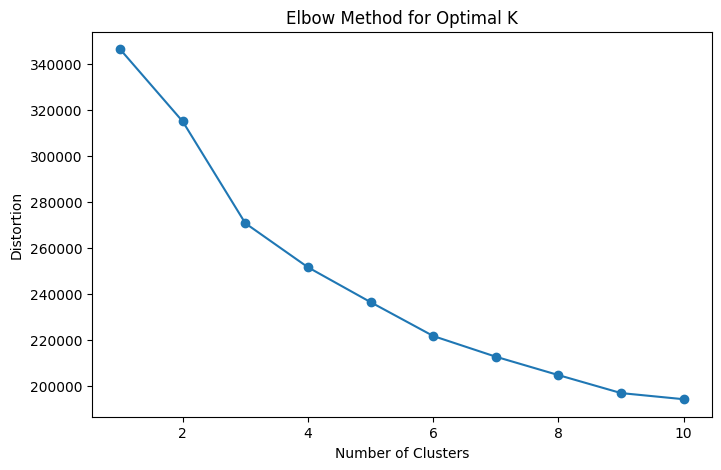

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

Apply K-Means with optimal number of clusters (choose based on elbow plot )

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


In [27]:
print("\nK-Means Clustering Results:")
print(data.groupby('KMeans_Cluster').mean(numeric_only=True))



K-Means Clustering Results:
                Current Loan Amount  Credit Score  Annual Income  \
KMeans_Cluster                                                     
0                     478650.518327    715.773825   2.151417e+06   
1                     333125.245497   7086.917138   1.358407e+06   
2                     240015.005915    714.139554   1.153282e+06   

                Years in current job  Monthly Debt  Years of Credit History  \
KMeans_Cluster                                                                
0                           7.041613  30364.278136                22.086352   
1                           5.978899  19586.203881                18.679619   
2                           5.779799  14206.962836                17.653525   

                Months since last delinquent  Number of Open Accounts  \
KMeans_Cluster                                                          
0                                  31.431113                14.458603   
1              

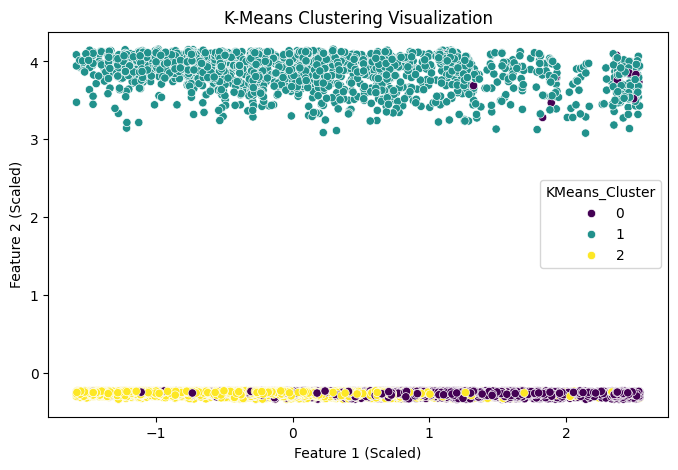

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

 Analyzing non-numeric column distribution within each cluster

In [29]:
for cluster in data['KMeans_Cluster'].unique():
    print(f"\nCluster {cluster} Loan Status Distribution:")
    print(data[data['KMeans_Cluster'] == cluster]['Loan Status'].value_counts())


Cluster 2 Loan Status Distribution:
Loan Status
Fully Paid     16488
Charged Off     3798
Name: count, dtype: int64

Cluster 0 Loan Status Distribution:
Loan Status
Fully Paid     7566
Charged Off    1710
Name: count, dtype: int64

Cluster 1 Loan Status Distribution:
Loan Status
Charged Off    1943
Name: count, dtype: int64


DBSCAN Clustering (Scikit-Learn)

In [30]:
dbscan = DBSCAN(eps=1.5, min_samples=5) # Adjust eps and min_samples as needed
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [31]:
print("\nDBSCAN Clustering Results:")
print(data.groupby('DBSCAN_Cluster').mean(numeric_only=True))


DBSCAN Clustering Results:
                Current Loan Amount  Credit Score  Annual Income  \
DBSCAN_Cluster                                                     
-1                    460734.774515   2049.690305   3.114392e+06   
 0                    260093.750657    710.350073   1.249579e+06   
 1                    314714.924395    712.753693   1.387916e+06   
 2                    313612.996471   7098.870854   1.180707e+06   
 3                    239597.740053    708.050398   1.163610e+06   
 4                    254969.733333   7095.266667   1.087534e+06   
 5                    215063.340426    711.510638   1.157435e+06   
 6                    130592.000000   7336.000000   9.030282e+05   
 7                    405620.285714    721.857143   1.933519e+06   
 8                    770326.857143    695.714286   2.483596e+06   
 9                    758260.800000    681.600000   2.387711e+06   
 10                   209044.000000    700.000000   2.631656e+06   
 11                 

Agglomerative Clustering (Scikit-Learn)

In [32]:
agg_clustering = AgglomerativeClustering(n_clusters=3) # Adjust number of clusters as needed
data['Agglomerative_Cluster'] = agg_clustering.fit_predict(X_scaled)


In [33]:
print("\nAgglomerative Clustering Results:")
print(data.groupby('Agglomerative_Cluster').mean(numeric_only=True))



Agglomerative Clustering Results:
                       Current Loan Amount  Credit Score  Annual Income  \
Agglomerative_Cluster                                                     
0                            561381.979991    718.980456   2.575997e+06   
1                            272900.533993    715.498021   1.278333e+06   
2                            334100.529685   7086.019618   1.350695e+06   

                       Years in current job  Monthly Debt  \
Agglomerative_Cluster                                       
0                                  6.990228  34555.100186   
1                                  6.036209  16663.979564   
2                                  5.991224  19773.310299   

                       Years of Credit History  Months since last delinquent  \
Agglomerative_Cluster                                                          
0                                    22.039460                     28.741973   
1                                    18.533

Gaussian Mixture Model (GMM) Clustering (Scikit-Learn)

In [34]:
gmm = GaussianMixture(n_components=3, random_state=42) # Adjust number of components as needed
data['GMM_Cluster'] = gmm.fit_predict(X_scaled)


In [35]:
print("\nGaussian Mixture Model Clustering Results:")
print(data.groupby('GMM_Cluster').mean(numeric_only=True))


Gaussian Mixture Model Clustering Results:
             Current Loan Amount  Credit Score  Annual Income  \
GMM_Cluster                                                     
0                  443963.193722    714.279549   3.057742e+06   
1                  335249.368798   7085.764706   1.389586e+06   
2                  305169.405038    711.982371   1.346371e+06   

             Years in current job  Monthly Debt  Years of Credit History  \
GMM_Cluster                                                                
0                        6.410495  32985.965228                23.121432   
1                        5.987212  19854.020261                18.702864   
2                        6.157828  18241.594036                18.740802   

             Months since last delinquent  Number of Open Accounts  \
GMM_Cluster                                                          
0                               30.032859                14.560569   
1                               34.4291

# Ward Hierarchical Clustering using PyTorch

In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [55]:
data_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Use SciPy's linkage function for hierarchical clustering with Ward's method
linkage_matrix = linkage(data_tensor.numpy(), method='ward')

print("\nLinkage Matrix Shape:", linkage_matrix.shape)


Linkage Matrix Shape: (31504, 4)


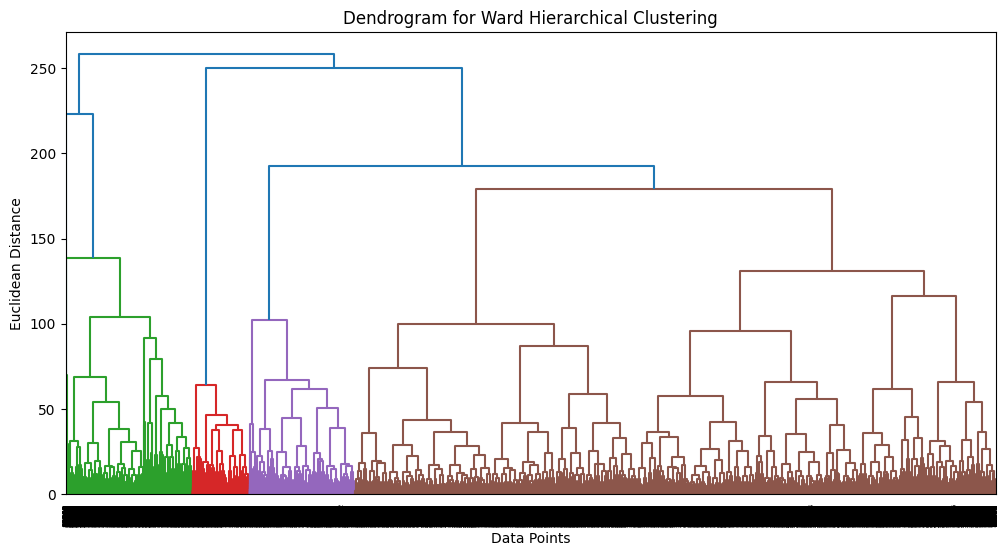

In [56]:
def plot_dendrogram(linkage_matrix, truncate_mode=None):
    """
    Plot a dendrogram for hierarchical clustering.

    Parameters:
        linkage_matrix: The linkage matrix computed using Ward's method.
        truncate_mode: Truncation mode for the dendrogram (e.g., None or "level").
    """
    plt.figure(figsize=(12, 6))
    dendrogram(linkage_matrix, truncate_mode=truncate_mode)
    plt.title("Dendrogram for Ward Hierarchical Clustering")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    plt.show()

plot_dendrogram(linkage_matrix)

In [57]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 3  # Specify the number of clusters
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

data['Ward_Cluster'] = cluster_labels

print("\nCluster Assignments:")
print(data.groupby('Ward_Cluster').mean(numeric_only=True))


Cluster Assignments:
              Current Loan Amount  Credit Score  Annual Income  \
Ward_Cluster                                                     
1                   561381.979991    718.980456   2.575997e+06   
2                   334100.529685   7086.019618   1.350695e+06   
3                   272900.533993    715.498021   1.278333e+06   

              Years in current job  Monthly Debt  Years of Credit History  \
Ward_Cluster                                                                
1                         6.990228  34555.100186                22.039460   
2                         5.991224  19773.310299                18.697728   
3                         6.036209  16663.979564                18.533589   

              Months since last delinquent  Number of Open Accounts  \
Ward_Cluster                                                          
1                                28.741973                13.727780   
2                                34.420237      

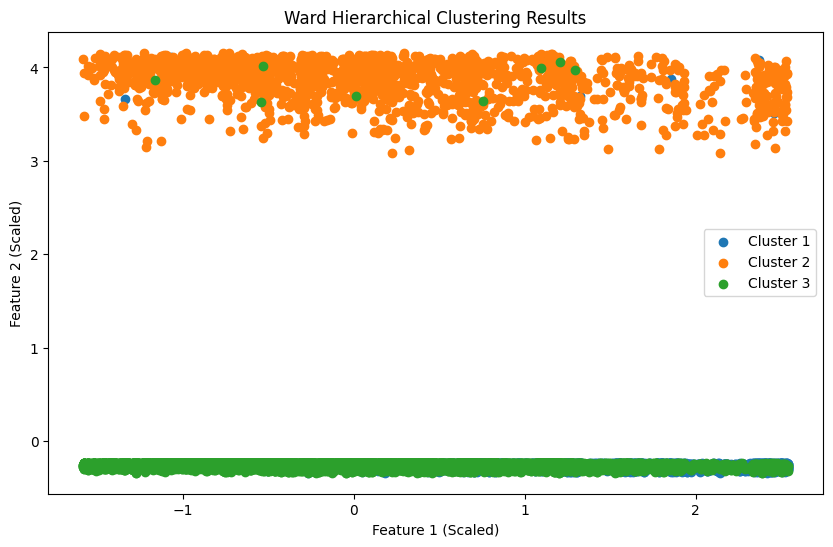

In [58]:
plt.figure(figsize=(10, 6))
for cluster_id in np.unique(cluster_labels):
    cluster_points = X_scaled[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')
plt.title('Ward Hierarchical Clustering Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()